In [45]:
import dlib
import cv2
import numpy as np

- Making detector and model

In [47]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor("../DATA/shape_predictor_68_face_landmarks.dat")
facerec = dlib.face_recognition_model_v1("../DATA/dlib_face_recognition_resnet_model_v1.dat")

- Making get embeddings fun for getting img embeddings

In [48]:
def get_embedding(img):
    dets = detector(img)
    for d in dets:
        shape = sp(img, d)
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        return np.array(face_descriptor)

- Will get all faces from stored faces and will get embeddings and store them in dict

In [13]:
import os

In [51]:
dict_embeddings = {}
source_folder = "StoredFaces"

for filename in os.listdir(source_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"): 
        file_path = os.path.join(source_folder, filename)
        img = cv2.imread(file_path)
        img_emb = get_embedding(img)
        dict_embeddings[filename] = img_emb

In [52]:
dict_embeddings

{'face_0.jpg': array([-1.70849428e-01,  1.89070791e-01,  5.56415282e-02, -7.29355961e-02,
        -1.87689260e-01, -7.18919188e-02, -3.83153111e-02, -8.21529105e-02,
         1.44305378e-01,  1.15828760e-01,  2.96449035e-01, -5.80054224e-02,
        -3.06004226e-01,  9.27109388e-04, -9.19622928e-02,  1.08412117e-01,
        -1.84557512e-01, -6.35987297e-02, -3.55751179e-02, -2.48221122e-02,
         5.63983694e-02,  1.94437150e-02,  7.37055317e-02,  1.19314894e-01,
        -1.50953876e-02, -3.29911530e-01, -6.34437278e-02, -9.79037806e-02,
         1.81647092e-01, -1.13268636e-01, -6.94917701e-03,  7.76625201e-02,
        -2.54124403e-01, -1.88829750e-01,  3.40633690e-02,  1.12172119e-01,
        -8.92372355e-02, -1.17623232e-01,  3.04590374e-01, -1.99683942e-04,
        -8.69041309e-02,  5.00626191e-02,  1.97757576e-02,  3.11249644e-01,
         1.00814693e-01,  5.57864383e-02,  2.77056191e-02, -1.02825306e-01,
         1.07157327e-01, -2.44074658e-01,  1.21880814e-01,  2.48852491e-01

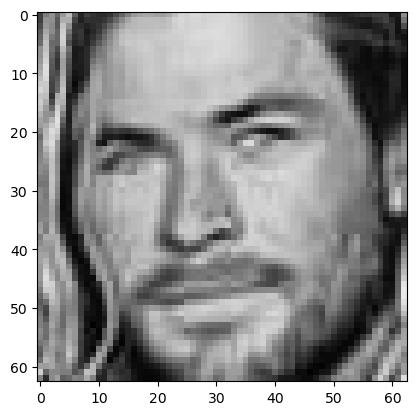

In [35]:
import matplotlib.pyplot as plt
file = os.path.join(source_folder, 'face_0.jpg')
file = cv2.imread(file)
# file = cv2.cvtColor(file
plt.imshow(file, cmap='gray')

In [55]:
import pickle

with open("face_embeddings.pkl", "wb") as f:
    pickle.dump(dict_embeddings, f)

In [61]:
target_embeddings = {}
ource_folder = "StoredFaces"
file_path = os.path.join(source_folder, 'target.jpg')
target = cv2.imread(file_path)
target_emb = get_embedding(target)
target_embeddings['target'] = target_emb
with open("target_embeddings.pkl", "wb") as f:
    pickle.dump(target_embeddings, f)